In [1]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", context="talk")

In [2]:
main_files = sorted(glob.glob("results_main__*.csv"))
beam_files = sorted(glob.glob("results_beam__*.csv"))

df_main = pd.concat([pd.read_csv(f) for f in main_files], ignore_index=True)
df_beam = pd.concat([pd.read_csv(f) for f in beam_files], ignore_index=True)

df_main["x"] = pd.to_numeric(df_main["x"], errors="coerce")
df_main["ppl"] = pd.to_numeric(df_main["ppl"], errors="coerce")
df_main["repeat_rate"] = pd.to_numeric(df_main["repeat_rate"], errors="coerce")
df_main["self_bleu"] = pd.to_numeric(df_main["self_bleu"], errors="coerce")

df_beam["beams"] = pd.to_numeric(df_beam["beams"], errors="coerce")
df_beam["avg_new_tokens"] = pd.to_numeric(df_beam["avg_new_tokens"], errors="coerce")
df_beam["avg_distinct_trigrams"] = pd.to_numeric(df_beam["avg_distinct_trigrams"], errors="coerce")
df_beam["stop_early_rate"] = pd.to_numeric(df_beam["stop_early_rate"], errors="coerce")

In [3]:
def short_model_name(mid: str) -> str:
    return mid.split("/")[-1]

df_main["model"] = df_main["model_id"].apply(short_model_name)
df_beam["model"] = df_beam["model_id"].apply(short_model_name)

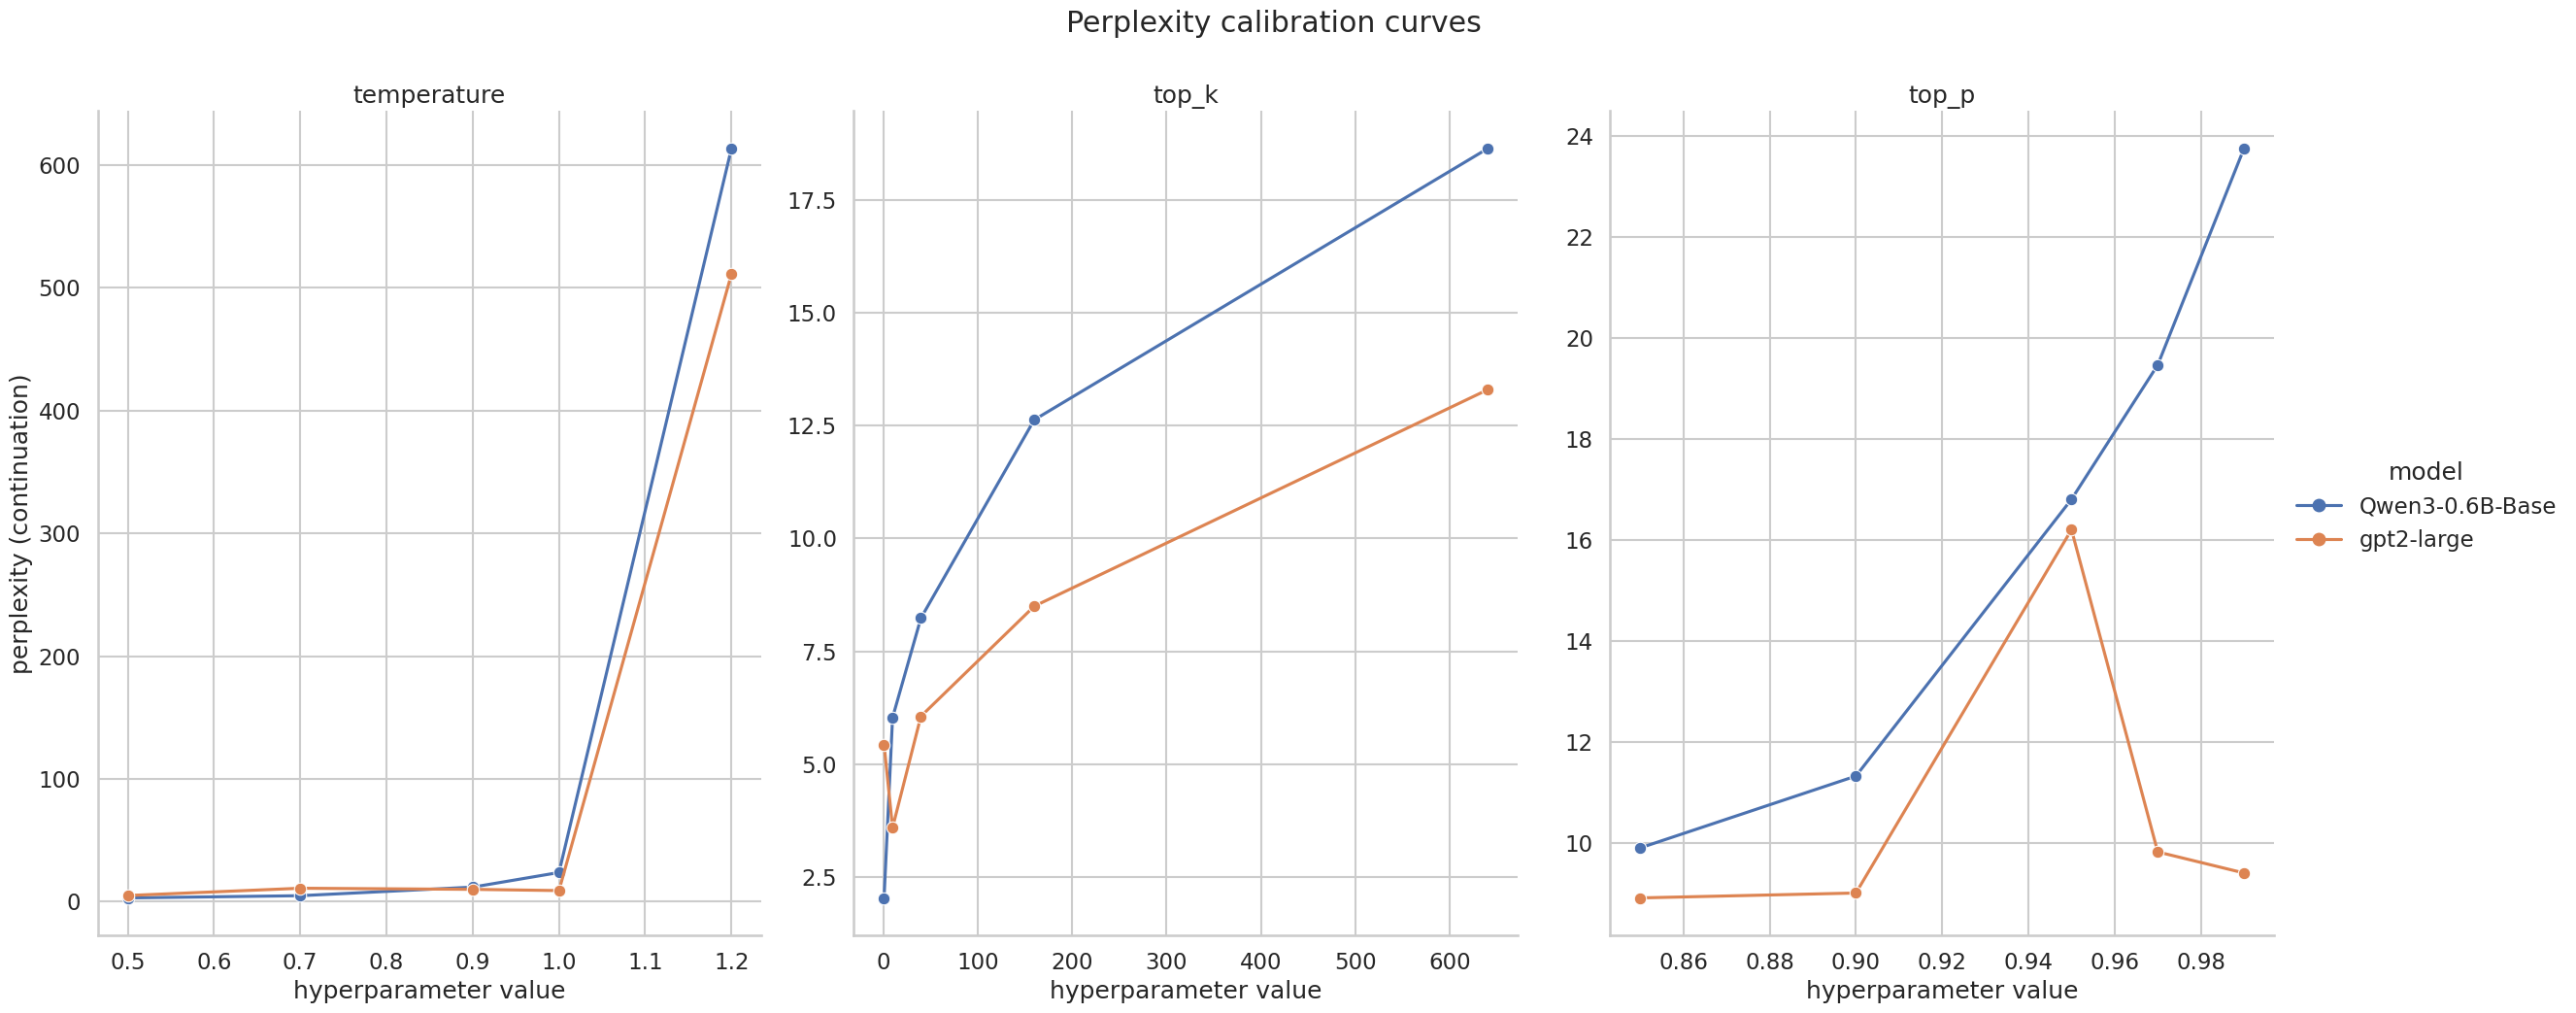

In [ ]:
g = sns.relplot(
    data=df_main,
    x="x", y="ppl",
    hue="model",
    col="family",
    kind="line",
    marker="o",
    facet_kws=dict(sharex=False, sharey=False),
    height=10, aspect=.8
)
g.set_axis_labels("hyperparameter value", "perplexity (continuation)")
g.set_titles("{col_name}")
g.figure.suptitle("Perplexity calibration curves", y=1.05)
plt.show()

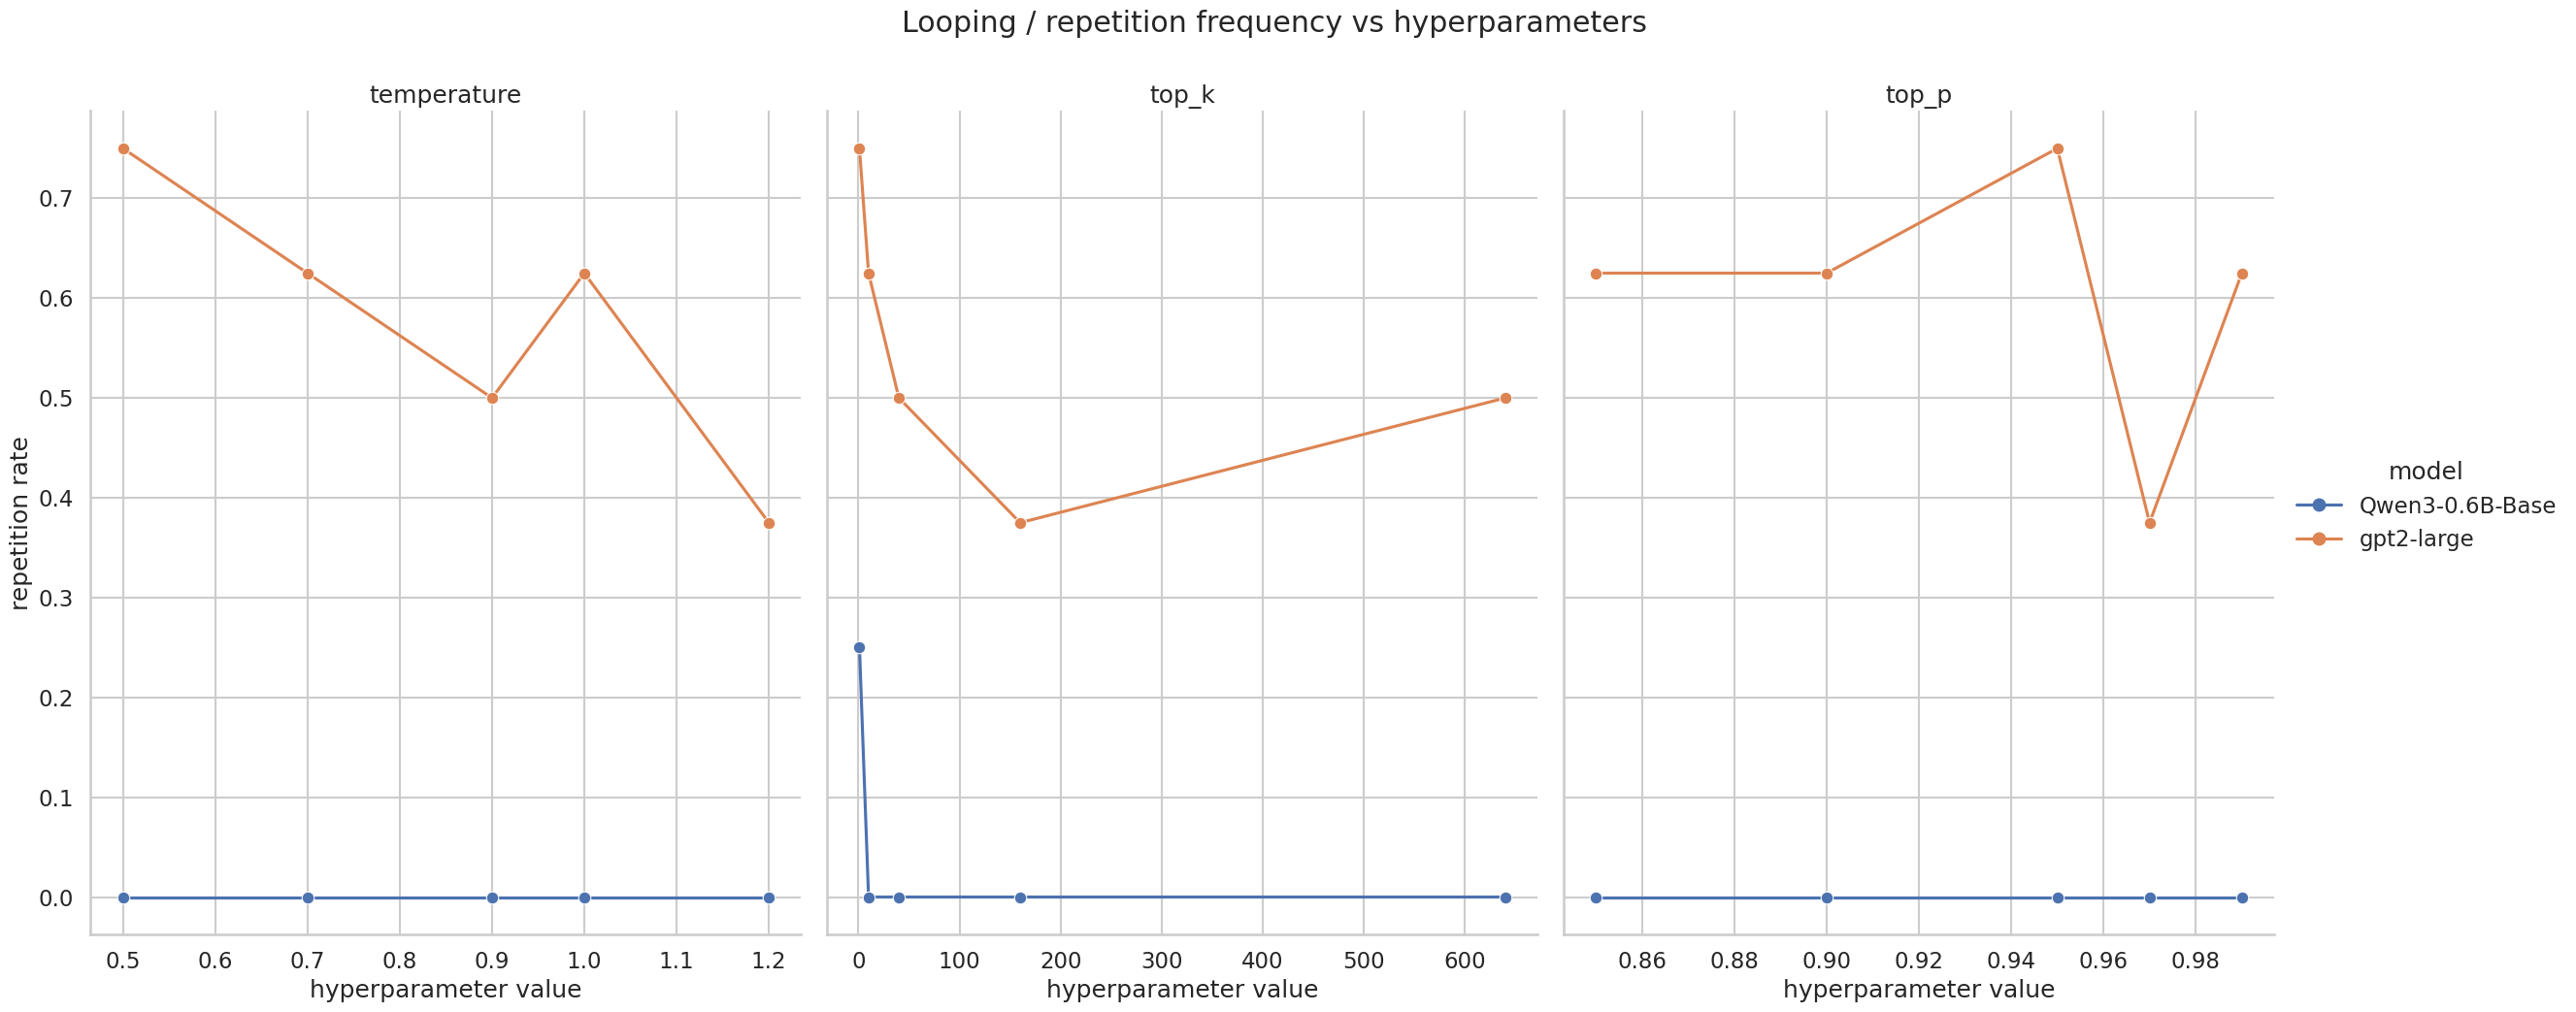

In [10]:
g = sns.relplot(
    data=df_main,
    x="x", y="repeat_rate",
    hue="model",
    col="family",
    kind="line",
    marker="o",
    facet_kws=dict(sharex=False, sharey=True),
    height=10, aspect=.8
)
g.set_axis_labels("hyperparameter value", "repetition rate")
g.set_titles("{col_name}")
g.figure.suptitle("Looping / repetition frequency vs hyperparameters", y=1.05)
plt.show()

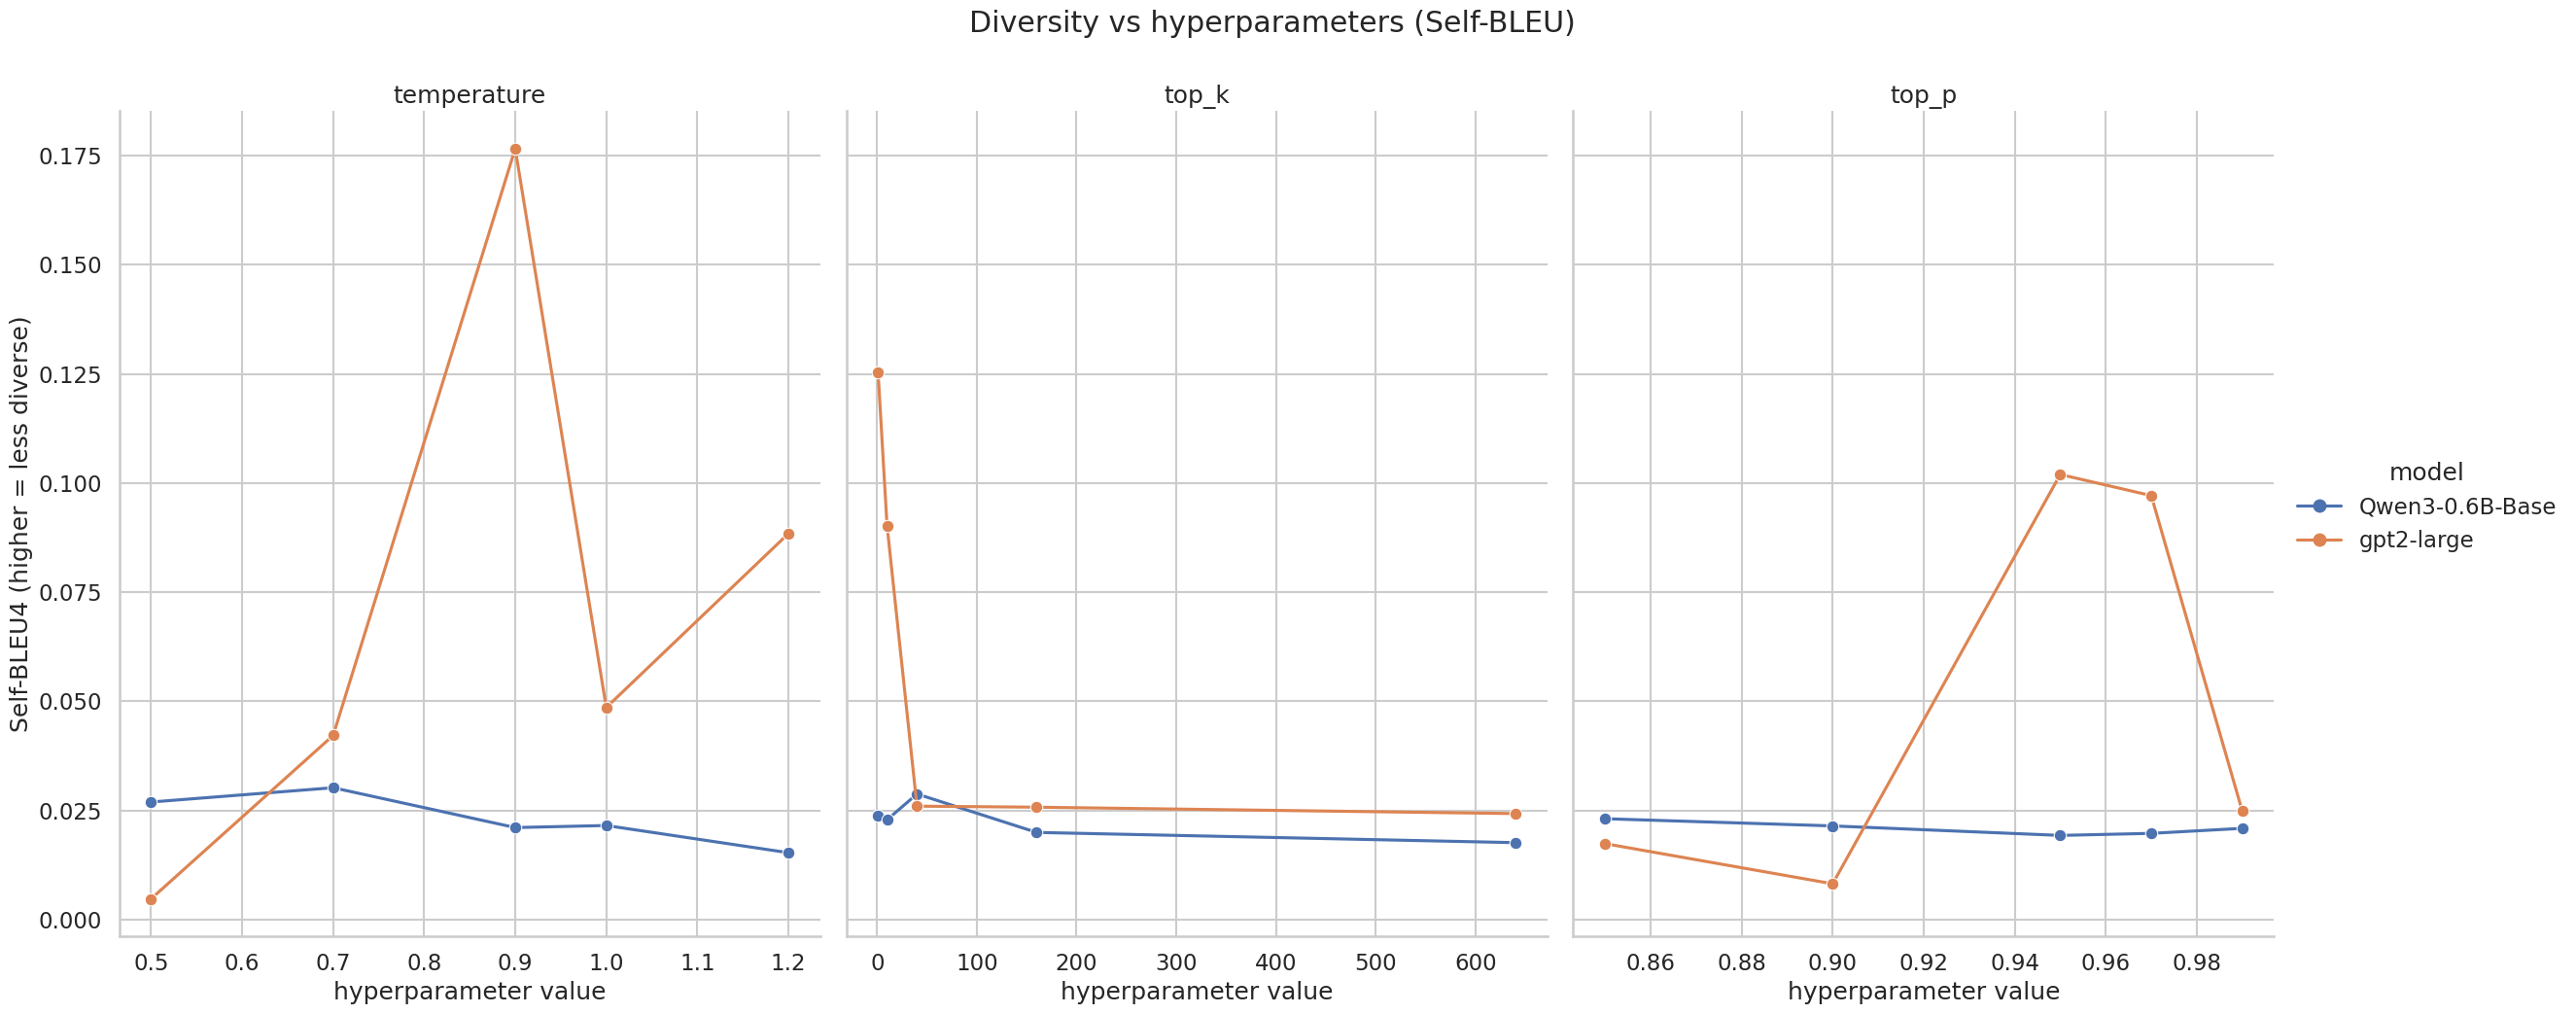

In [11]:
g = sns.relplot(
    data=df_main,
    x="x", y="self_bleu",
    hue="model",
    col="family",
    kind="line",
    marker="o",
    facet_kws=dict(sharex=False, sharey=True),
    height=10, aspect=.8
)
g.set_axis_labels("hyperparameter value", "Self-BLEU4 (higher = less diverse)")
g.set_titles("{col_name}")
g.fig.suptitle("Diversity vs hyperparameters (Self-BLEU)", y=1.05)
plt.show()

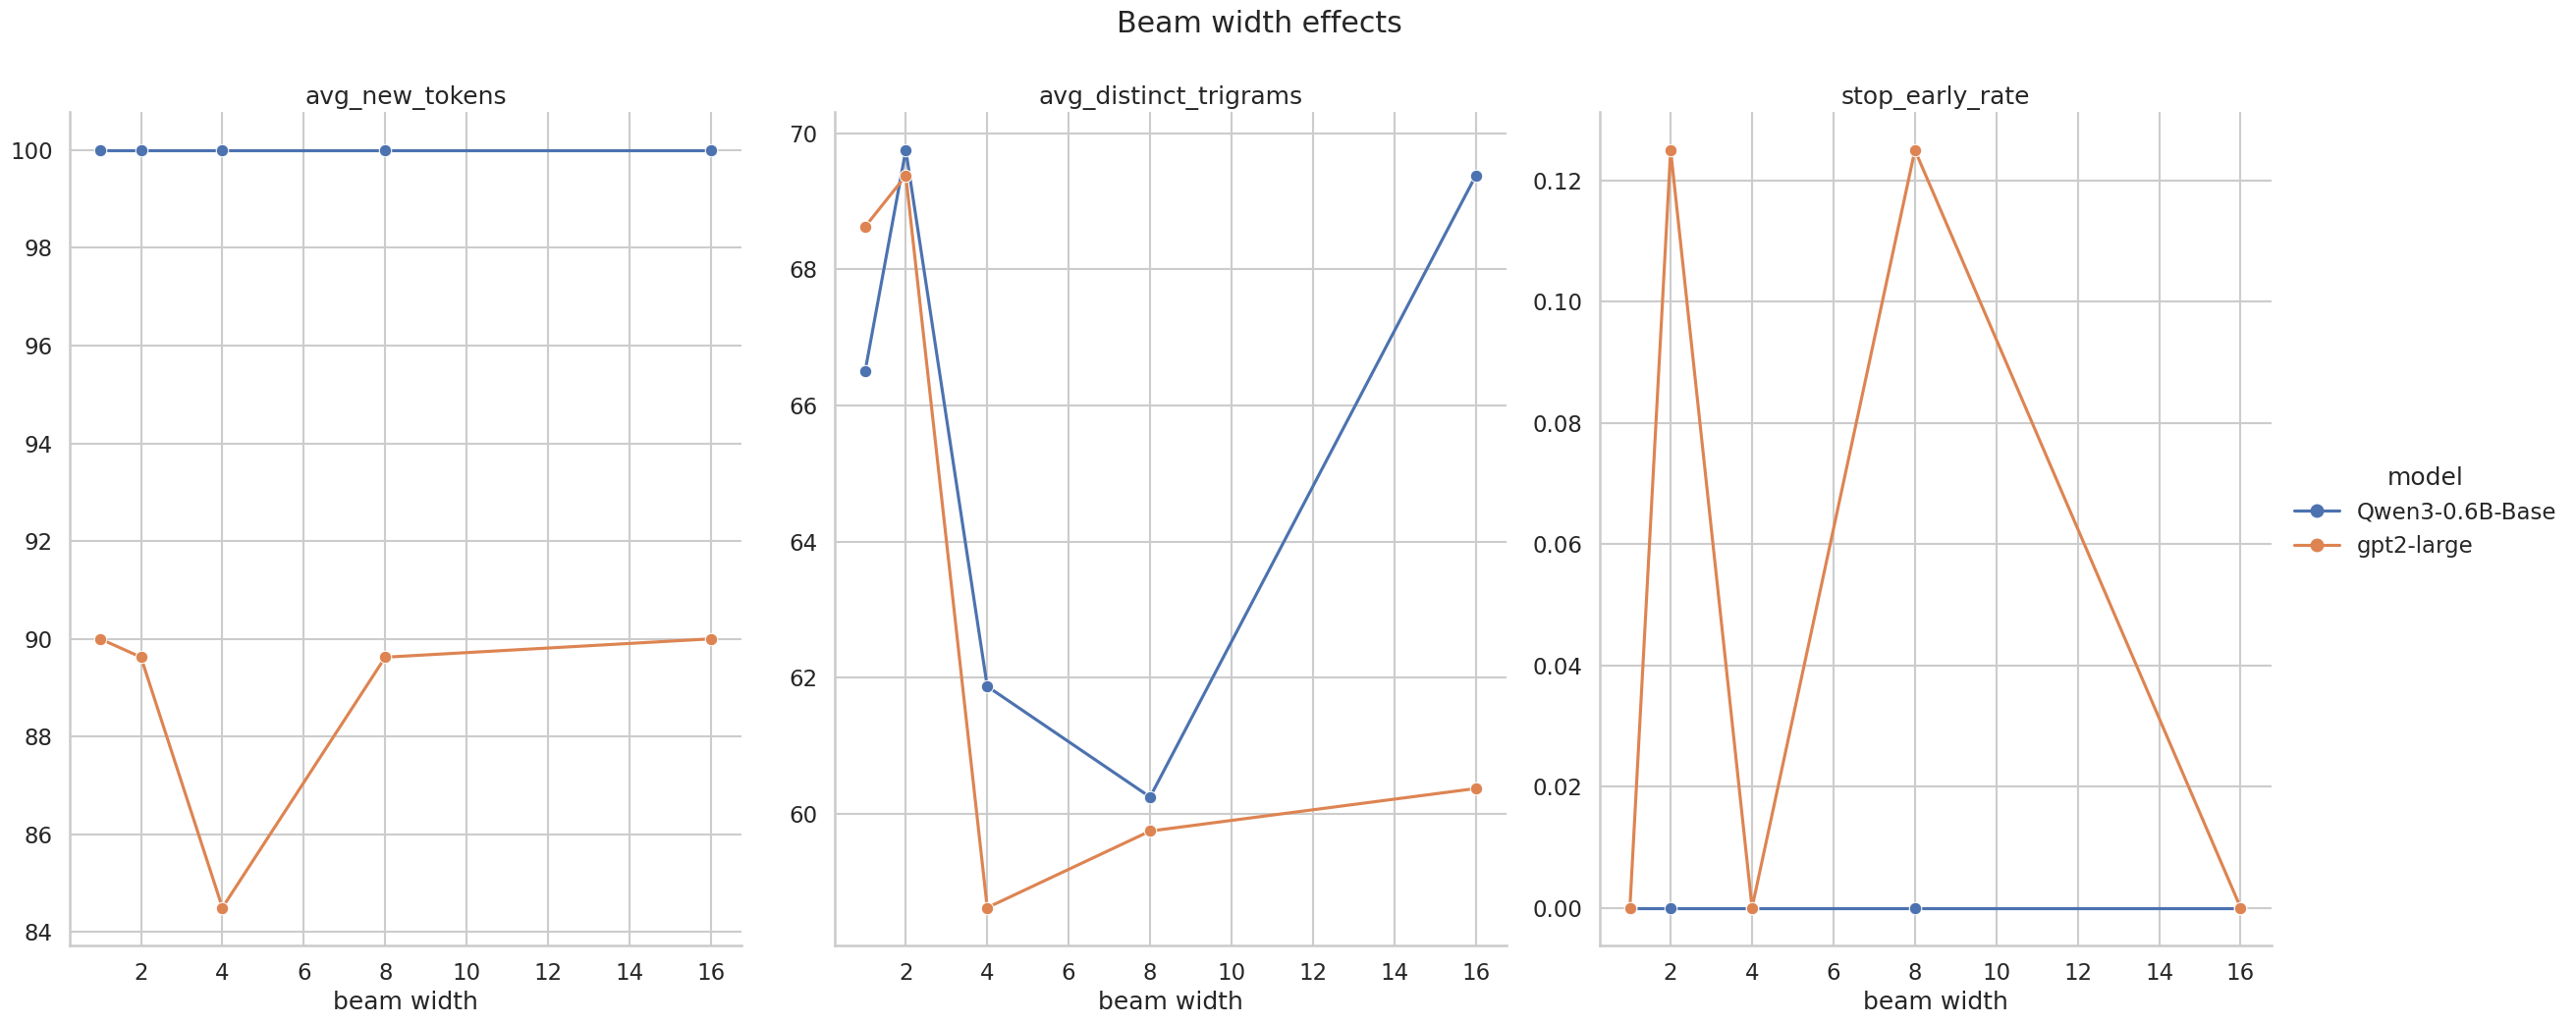

In [ ]:
df_beam_long = df_beam.melt(
    id_vars=["model", "model_id", "beams"],
    value_vars=["avg_new_tokens", "avg_distinct_trigrams", "stop_early_rate"],
    var_name="metric",
    value_name="value"
)

g = sns.relplot(
    data=df_beam_long,
    x="beams", y="value",
    hue="model",
    col="metric",
    kind="line",
    marker="o",
    facet_kws=dict(sharey=False),
    height=10, aspect=.8
)
g.set_axis_labels("beam width", "")
g.set_titles("{col_name}")
g.figure.suptitle("Beam width effects", y=1.05)
plt.show()